In [48]:
import yalefaceDataset as yfd
import vgg16 as vg
import CNN 

In [49]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.preprocessing import LabelEncoder

In [25]:
# a = pd.read_csv("./data/yale_train.csv")
# b = a.loc[:,["subject"]]
# le = LabelEncoder()
# le.fit(b)
# c = le.transform(b)
# le.classes_
# le.inverse_transform(c)

In [34]:
trans = transforms.Compose([
                            transforms.Resize((200,200)), 
                            transforms.ToTensor(),
                            transforms.Normalize([0.5],[0.5])
                           ])

In [35]:
train_data = yfd.YalefaceDataset(train=True, transform=trans)
test_data = yfd.YalefaceDataset(train=False, transform=trans)


In [36]:
train_loader = DataLoader(dataset=train_data,
                                            batch_size=10,
                                            shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=10,shuffle=True)
len(test_loader)

4

In [37]:
import numpy as np

import matplotlib.cm as cm

from matplotlib import pyplot as plt



# Z=np.array([[20,5,2],[2,20,3],[11,2,20]])



# plt.imshow(Z)

# plt.imshow(Z, cmap = cm.gray)

# plt.show()

torch.Size([10, 1, 200, 200])


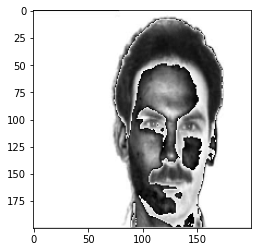

In [38]:
t = transforms.ToPILImage()

for i,(img,label) in enumerate(test_loader) :
    print(img.shape)
    plt.imshow(t(img[0]),cmap=cm.gray)
    break

In [39]:
vgg16 = vg.VGG16(1,15)
cnn = CNN.CNN()

In [40]:
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(),lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)

In [42]:
for epoch in range(30) :
    avg_loss = 0
    cnt = 0
    for i,(img,label) in enumerate(train_loader) :
        optimizer.zero_grad() # 배치마다 optimizer 초기화
        outputs = cnn(img)
        loss = cost(outputs,label)
        avg_loss += loss.data
        cnt +=1
        loss.backward()
        optimizer.step()
    print("[E: %d] loss: %f, avg_loss: %f" % (epoch, loss.data, avg_loss/cnt))
    scheduler.step(avg_loss)

[E: 0] loss: 0.000002, avg_loss: 0.000009
[E: 1] loss: 0.000000, avg_loss: 0.000008
[E: 2] loss: 0.000003, avg_loss: 0.000008
[E: 3] loss: 0.000000, avg_loss: 0.000007
[E: 4] loss: 0.000002, avg_loss: 0.000006
[E: 5] loss: 0.000002, avg_loss: 0.000006
[E: 6] loss: 0.000001, avg_loss: 0.000005
[E: 7] loss: 0.000019, avg_loss: 0.000006
[E: 8] loss: 0.000000, avg_loss: 0.000005
[E: 9] loss: 0.000000, avg_loss: 0.000004
[E: 10] loss: 0.000000, avg_loss: 0.000004
[E: 11] loss: 0.000002, avg_loss: 0.000004
[E: 12] loss: 0.000005, avg_loss: 0.000004
[E: 13] loss: 0.000002, avg_loss: 0.000003
[E: 14] loss: 0.000002, avg_loss: 0.000003
[E: 15] loss: 0.000000, avg_loss: 0.000003
[E: 16] loss: 0.000000, avg_loss: 0.000003
[E: 17] loss: 0.000005, avg_loss: 0.000003
[E: 18] loss: 0.000005, avg_loss: 0.000003
[E: 19] loss: 0.000000, avg_loss: 0.000003
[E: 20] loss: 0.000000, avg_loss: 0.000002
[E: 21] loss: 0.000000, avg_loss: 0.000002
[E: 22] loss: 0.000012, avg_loss: 0.000003
[E: 23] loss: 0.00002

In [44]:
# test
cnn.parameters()

<generator object Module.parameters at 0x7fae10642660>

In [53]:
correct = 0
total = 0
for i,(img,label) in enumerate(test_loader) :
    outputs = cnn(img)
    _,predicted = torch.max(outputs.data,1)
    total += label.size(0)
    correct += (predicted.cpu() == label).sum()
    print(predicted, label, correct, total)
    print("avg acc : %f"%(100*correct/total))

tensor([12,  8,  0,  1, 14, 13,  4,  4,  4,  1]) tensor([12,  8,  0,  1, 14, 13,  4,  4,  4,  1]) tensor(10) 10
avg acc : 100.000000
tensor([1, 8, 7, 8, 1, 5, 7, 3, 2, 4]) tensor([1, 8, 7, 8, 1, 5, 7, 3, 2, 4]) tensor(20) 20
avg acc : 100.000000
tensor([ 0,  9, 12,  1, 11,  0, 12,  8, 13,  3]) tensor([ 0,  9, 12,  1, 11,  0, 12,  8, 13,  3]) tensor(30) 30
avg acc : 100.000000
tensor([6, 3, 4]) tensor([6, 3, 4]) tensor(33) 33
avg acc : 100.000000


In [ ]:
# demo
